# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

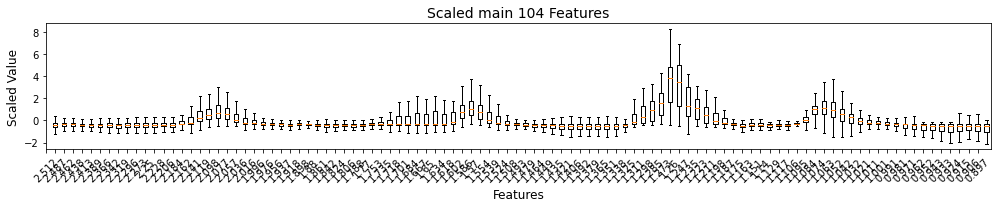

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

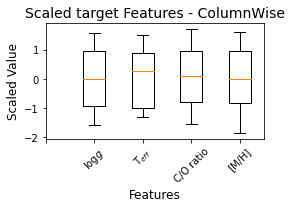

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

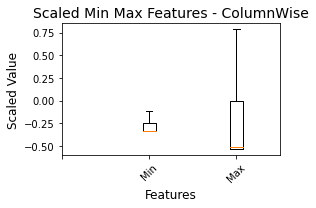

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:23 - loss: 1.8625 - gravity_loss: 0.4758 - c_o_ratio_loss: 0.4699 - metallicity_loss: 0.4618 - temperature_loss: 0.4550 - gravity_mae: 0.8809 - c_o_ratio_mae: 0.8915 - metallicity_mae: 0.8582 - temperature_mae: 0.8552

 2/13 [===>..........................] - ETA: 41s - loss: 1.8262 - gravity_loss: 0.4656 - c_o_ratio_loss: 0.4650 - metallicity_loss: 0.4507 - temperature_loss: 0.4449 - gravity_mae: 0.8687 - c_o_ratio_mae: 0.8848 - metallicity_mae: 0.8411 - temperature_mae: 0.8406 

 3/13 [=====>........................] - ETA: 38s - loss: 1.8208 - gravity_loss: 0.4691 - c_o_ratio_loss: 0.4693 - metallicity_loss: 0.4498 - temperature_loss: 0.4326 - gravity_mae: 0.8717 - c_o_ratio_mae: 0.8908 - metallicity_mae: 0.8420 - temperature_mae: 0.8251

 4/13 [========>.....................] - ETA: 34s - loss: 1.7914 - gravity_loss: 0.4626 - c_o_ratio_loss: 0.4672 - metallicity_loss: 0.4506 - temperature_loss: 0.4110 - gravity_mae: 0.8643 - c_o_ratio_mae: 0.8884 - metallicity_mae: 0.8438 - temperature_mae: 0.7952

 5/13 [==========>...................] - ETA: 31s - loss: 1.7541 - gravity_loss: 0.4614 - c_o_ratio_loss: 0.4662 - metallicity_loss: 0.4406 - temperature_loss: 0.3858 - gravity_mae: 0.8634 - c_o_ratio_mae: 0.8870 - metallicity_mae: 0.8330 - temperature_mae: 0.7564

 6/13 [============>.................] - ETA: 28s - loss: 1.7129 - gravity_loss: 0.4578 - c_o_ratio_loss: 0.4640 - metallicity_loss: 0.4284 - temperature_loss: 0.3627 - gravity_mae: 0.8590 - c_o_ratio_mae: 0.8840 - metallicity_mae: 0.8186 - temperature_mae: 0.7200

 7/13 [===============>..............] - ETA: 24s - loss: 1.6706 - gravity_loss: 0.4574 - c_o_ratio_loss: 0.4620 - metallicity_loss: 0.4119 - temperature_loss: 0.3393 - gravity_mae: 0.8584 - c_o_ratio_mae: 0.8807 - metallicity_mae: 0.7985 - temperature_mae: 0.6866

 8/13 [=================>............] - ETA: 20s - loss: 1.6273 - gravity_loss: 0.4542 - c_o_ratio_loss: 0.4608 - metallicity_loss: 0.3963 - temperature_loss: 0.3161 - gravity_mae: 0.8550 - c_o_ratio_mae: 0.8792 - metallicity_mae: 0.7780 - temperature_mae: 0.6598

 9/13 [===================>..........] - ETA: 17s - loss: 1.5856 - gravity_loss: 0.4497 - c_o_ratio_loss: 0.4583 - metallicity_loss: 0.3869 - temperature_loss: 0.2907 - gravity_mae: 0.8496 - c_o_ratio_mae: 0.8752 - metallicity_mae: 0.7660 - temperature_mae: 0.6233

10/13 [======================>.......] - ETA: 13s - loss: 1.5485 - gravity_loss: 0.4455 - c_o_ratio_loss: 0.4538 - metallicity_loss: 0.3827 - temperature_loss: 0.2665 - gravity_mae: 0.8445 - c_o_ratio_mae: 0.8693 - metallicity_mae: 0.7607 - temperature_mae: 0.5853

11/13 [========================>.....] - ETA: 9s - loss: 1.5111 - gravity_loss: 0.4414 - c_o_ratio_loss: 0.4499 - metallicity_loss: 0.3731 - temperature_loss: 0.2467 - gravity_mae: 0.8396 - c_o_ratio_mae: 0.8640 - metallicity_mae: 0.7487 - temperature_mae: 0.5536 

12/13 [==========================>...] - ETA: 4s - loss: 1.4744 - gravity_loss: 0.4358 - c_o_ratio_loss: 0.4461 - metallicity_loss: 0.3604 - temperature_loss: 0.2321 - gravity_mae: 0.8327 - c_o_ratio_mae: 0.8589 - metallicity_mae: 0.7317 - temperature_mae: 0.5340

13/13 [==============================] - ETA: 0s - loss: 1.4672 - gravity_loss: 0.4348 - c_o_ratio_loss: 0.4453 - metallicity_loss: 0.3582 - temperature_loss: 0.2290 - gravity_mae: 0.8314 - c_o_ratio_mae: 0.8578 - metallicity_mae: 0.7290 - temperature_mae: 0.5294

13/13 [==============================] - 65s 5s/step - loss: 1.4672 - gravity_loss: 0.4348 - c_o_ratio_loss: 0.4453 - metallicity_loss: 0.3582 - temperature_loss: 0.2290 - gravity_mae: 0.8314 - c_o_ratio_mae: 0.8578 - metallicity_mae: 0.7290 - temperature_mae: 0.5294 - val_loss: 0.9162 - val_gravity_loss: 0.3506 - val_c_o_ratio_loss: 0.3307 - val_metallicity_loss: 0.2027 - val_temperature_loss: 0.0321 - val_gravity_mae: 0.7285 - val_c_o_ratio_mae: 0.7169 - val_metallicity_mae: 0.5219 - val_temperature_mae: 0.2106


Epoch 2/4


 1/13 [=>............................] - ETA: 1:34 - loss: 0.9709 - gravity_loss: 0.3633 - c_o_ratio_loss: 0.3499 - metallicity_loss: 0.2220 - temperature_loss: 0.0356 - gravity_mae: 0.7411 - c_o_ratio_mae: 0.7364 - metallicity_mae: 0.5552 - temperature_mae: 0.2073

 2/13 [===>..........................] - ETA: 1:19 - loss: 0.9628 - gravity_loss: 0.3555 - c_o_ratio_loss: 0.3328 - metallicity_loss: 0.2304 - temperature_loss: 0.0441 - gravity_mae: 0.7336 - c_o_ratio_mae: 0.7149 - metallicity_mae: 0.5624 - temperature_mae: 0.2364

 3/13 [=====>........................] - ETA: 1:06 - loss: 0.9358 - gravity_loss: 0.3501 - c_o_ratio_loss: 0.3151 - metallicity_loss: 0.2294 - temperature_loss: 0.0411 - gravity_mae: 0.7266 - c_o_ratio_mae: 0.6930 - metallicity_mae: 0.5599 - temperature_mae: 0.2289

 4/13 [========>.....................] - ETA: 57s - loss: 0.9103 - gravity_loss: 0.3512 - c_o_ratio_loss: 0.2934 - metallicity_loss: 0.2244 - temperature_loss: 0.0413 - gravity_mae: 0.7265 - c_o_ratio_mae: 0.6593 - metallicity_mae: 0.5542 - temperature_mae: 0.2305 

 5/13 [==========>...................] - ETA: 50s - loss: 0.8923 - gravity_loss: 0.3523 - c_o_ratio_loss: 0.2769 - metallicity_loss: 0.2218 - temperature_loss: 0.0413 - gravity_mae: 0.7272 - c_o_ratio_mae: 0.6326 - metallicity_mae: 0.5503 - temperature_mae: 0.2281

 6/13 [============>.................] - ETA: 43s - loss: 0.8811 - gravity_loss: 0.3542 - c_o_ratio_loss: 0.2666 - metallicity_loss: 0.2204 - temperature_loss: 0.0400 - gravity_mae: 0.7266 - c_o_ratio_mae: 0.6180 - metallicity_mae: 0.5464 - temperature_mae: 0.2239

 7/13 [===============>..............] - ETA: 37s - loss: 0.8752 - gravity_loss: 0.3508 - c_o_ratio_loss: 0.2678 - metallicity_loss: 0.2184 - temperature_loss: 0.0382 - gravity_mae: 0.7219 - c_o_ratio_mae: 0.6164 - metallicity_mae: 0.5422 - temperature_mae: 0.2175

 8/13 [=================>............] - ETA: 31s - loss: 0.8695 - gravity_loss: 0.3502 - c_o_ratio_loss: 0.2644 - metallicity_loss: 0.2178 - temperature_loss: 0.0372 - gravity_mae: 0.7212 - c_o_ratio_mae: 0.6111 - metallicity_mae: 0.5414 - temperature_mae: 0.2140

 9/13 [===================>..........] - ETA: 24s - loss: 0.8527 - gravity_loss: 0.3460 - c_o_ratio_loss: 0.2561 - metallicity_loss: 0.2141 - temperature_loss: 0.0364 - gravity_mae: 0.7158 - c_o_ratio_mae: 0.5991 - metallicity_mae: 0.5361 - temperature_mae: 0.2114

10/13 [======================>.......] - ETA: 18s - loss: 0.8420 - gravity_loss: 0.3422 - c_o_ratio_loss: 0.2521 - metallicity_loss: 0.2114 - temperature_loss: 0.0362 - gravity_mae: 0.7107 - c_o_ratio_mae: 0.5914 - metallicity_mae: 0.5314 - temperature_mae: 0.2105

11/13 [========================>.....] - ETA: 12s - loss: 0.8281 - gravity_loss: 0.3391 - c_o_ratio_loss: 0.2437 - metallicity_loss: 0.2100 - temperature_loss: 0.0352 - gravity_mae: 0.7073 - c_o_ratio_mae: 0.5789 - metallicity_mae: 0.5293 - temperature_mae: 0.2076

12/13 [==========================>...] - ETA: 6s - loss: 0.8209 - gravity_loss: 0.3393 - c_o_ratio_loss: 0.2390 - metallicity_loss: 0.2080 - temperature_loss: 0.0347 - gravity_mae: 0.7079 - c_o_ratio_mae: 0.5727 - metallicity_mae: 0.5272 - temperature_mae: 0.2062 

13/13 [==============================] - ETA: 0s - loss: 0.8190 - gravity_loss: 0.3392 - c_o_ratio_loss: 0.2377 - metallicity_loss: 0.2076 - temperature_loss: 0.0345 - gravity_mae: 0.7078 - c_o_ratio_mae: 0.5710 - metallicity_mae: 0.5267 - temperature_mae: 0.2055

13/13 [==============================] - 79s 6s/step - loss: 0.8190 - gravity_loss: 0.3392 - c_o_ratio_loss: 0.2377 - metallicity_loss: 0.2076 - temperature_loss: 0.0345 - gravity_mae: 0.7078 - c_o_ratio_mae: 0.5710 - metallicity_mae: 0.5267 - temperature_mae: 0.2055 - val_loss: 0.6561 - val_gravity_loss: 0.3060 - val_c_o_ratio_loss: 0.1483 - val_metallicity_loss: 0.1771 - val_temperature_loss: 0.0246 - val_gravity_mae: 0.6652 - val_c_o_ratio_mae: 0.4241 - val_metallicity_mae: 0.4836 - val_temperature_mae: 0.1748


Epoch 3/4


 1/13 [=>............................] - ETA: 1:06 - loss: 0.6733 - gravity_loss: 0.3145 - c_o_ratio_loss: 0.1517 - metallicity_loss: 0.1813 - temperature_loss: 0.0259 - gravity_mae: 0.6791 - c_o_ratio_mae: 0.4411 - metallicity_mae: 0.4947 - temperature_mae: 0.1768

 2/13 [===>..........................] - ETA: 57s - loss: 0.6667 - gravity_loss: 0.3127 - c_o_ratio_loss: 0.1512 - metallicity_loss: 0.1777 - temperature_loss: 0.0251 - gravity_mae: 0.6746 - c_o_ratio_mae: 0.4409 - metallicity_mae: 0.4875 - temperature_mae: 0.1722 

 3/13 [=====>........................] - ETA: 52s - loss: 0.6615 - gravity_loss: 0.3125 - c_o_ratio_loss: 0.1437 - metallicity_loss: 0.1814 - temperature_loss: 0.0239 - gravity_mae: 0.6739 - c_o_ratio_mae: 0.4321 - metallicity_mae: 0.4913 - temperature_mae: 0.1668

 4/13 [========>.....................] - ETA: 47s - loss: 0.6551 - gravity_loss: 0.3088 - c_o_ratio_loss: 0.1418 - metallicity_loss: 0.1802 - temperature_loss: 0.0244 - gravity_mae: 0.6685 - c_o_ratio_mae: 0.4303 - metallicity_mae: 0.4896 - temperature_mae: 0.1696

 5/13 [==========>...................] - ETA: 42s - loss: 0.6464 - gravity_loss: 0.3088 - c_o_ratio_loss: 0.1364 - metallicity_loss: 0.1767 - temperature_loss: 0.0245 - gravity_mae: 0.6682 - c_o_ratio_mae: 0.4215 - metallicity_mae: 0.4835 - temperature_mae: 0.1699

 6/13 [============>.................] - ETA: 37s - loss: 0.6399 - gravity_loss: 0.3076 - c_o_ratio_loss: 0.1324 - metallicity_loss: 0.1762 - temperature_loss: 0.0237 - gravity_mae: 0.6660 - c_o_ratio_mae: 0.4136 - metallicity_mae: 0.4826 - temperature_mae: 0.1680

 7/13 [===============>..............] - ETA: 33s - loss: 0.6350 - gravity_loss: 0.3065 - c_o_ratio_loss: 0.1284 - metallicity_loss: 0.1756 - temperature_loss: 0.0245 - gravity_mae: 0.6639 - c_o_ratio_mae: 0.4049 - metallicity_mae: 0.4814 - temperature_mae: 0.1721

 8/13 [=================>............] - ETA: 27s - loss: 0.6321 - gravity_loss: 0.3078 - c_o_ratio_loss: 0.1256 - metallicity_loss: 0.1749 - temperature_loss: 0.0237 - gravity_mae: 0.6644 - c_o_ratio_mae: 0.3990 - metallicity_mae: 0.4803 - temperature_mae: 0.1691

 9/13 [===================>..........] - ETA: 22s - loss: 0.6281 - gravity_loss: 0.3070 - c_o_ratio_loss: 0.1231 - metallicity_loss: 0.1740 - temperature_loss: 0.0240 - gravity_mae: 0.6626 - c_o_ratio_mae: 0.3939 - metallicity_mae: 0.4780 - temperature_mae: 0.1700

10/13 [======================>.......] - ETA: 16s - loss: 0.6253 - gravity_loss: 0.3070 - c_o_ratio_loss: 0.1207 - metallicity_loss: 0.1735 - temperature_loss: 0.0241 - gravity_mae: 0.6626 - c_o_ratio_mae: 0.3896 - metallicity_mae: 0.4774 - temperature_mae: 0.1704

11/13 [========================>.....] - ETA: 11s - loss: 0.6216 - gravity_loss: 0.3066 - c_o_ratio_loss: 0.1185 - metallicity_loss: 0.1729 - temperature_loss: 0.0237 - gravity_mae: 0.6622 - c_o_ratio_mae: 0.3853 - metallicity_mae: 0.4769 - temperature_mae: 0.1688

12/13 [==========================>...] - ETA: 5s - loss: 0.6180 - gravity_loss: 0.3055 - c_o_ratio_loss: 0.1168 - metallicity_loss: 0.1719 - temperature_loss: 0.0239 - gravity_mae: 0.6609 - c_o_ratio_mae: 0.3824 - metallicity_mae: 0.4753 - temperature_mae: 0.1700 

13/13 [==============================] - ETA: 0s - loss: 0.6172 - gravity_loss: 0.3053 - c_o_ratio_loss: 0.1163 - metallicity_loss: 0.1717 - temperature_loss: 0.0238 - gravity_mae: 0.6605 - c_o_ratio_mae: 0.3814 - metallicity_mae: 0.4750 - temperature_mae: 0.1697

13/13 [==============================] - 71s 5s/step - loss: 0.6172 - gravity_loss: 0.3053 - c_o_ratio_loss: 0.1163 - metallicity_loss: 0.1717 - temperature_loss: 0.0238 - gravity_mae: 0.6605 - c_o_ratio_mae: 0.3814 - metallicity_mae: 0.4750 - temperature_mae: 0.1697 - val_loss: 0.5418 - val_gravity_loss: 0.2707 - val_c_o_ratio_loss: 0.0856 - val_metallicity_loss: 0.1566 - val_temperature_loss: 0.0288 - val_gravity_mae: 0.6112 - val_c_o_ratio_mae: 0.3277 - val_metallicity_mae: 0.4515 - val_temperature_mae: 0.2030


Epoch 4/4


 1/13 [=>............................] - ETA: 1:07 - loss: 0.5521 - gravity_loss: 0.2817 - c_o_ratio_loss: 0.0863 - metallicity_loss: 0.1607 - temperature_loss: 0.0233 - gravity_mae: 0.6272 - c_o_ratio_mae: 0.3254 - metallicity_mae: 0.4566 - temperature_mae: 0.1710

 2/13 [===>..........................] - ETA: 1:03 - loss: 0.5457 - gravity_loss: 0.2780 - c_o_ratio_loss: 0.0881 - metallicity_loss: 0.1570 - temperature_loss: 0.0227 - gravity_mae: 0.6212 - c_o_ratio_mae: 0.3307 - metallicity_mae: 0.4545 - temperature_mae: 0.1702

 3/13 [=====>........................] - ETA: 59s - loss: 0.5433 - gravity_loss: 0.2789 - c_o_ratio_loss: 0.0849 - metallicity_loss: 0.1587 - temperature_loss: 0.0207 - gravity_mae: 0.6212 - c_o_ratio_mae: 0.3232 - metallicity_mae: 0.4575 - temperature_mae: 0.1611 

 4/13 [========>.....................] - ETA: 53s - loss: 0.5413 - gravity_loss: 0.2783 - c_o_ratio_loss: 0.0838 - metallicity_loss: 0.1575 - temperature_loss: 0.0217 - gravity_mae: 0.6204 - c_o_ratio_mae: 0.3195 - metallicity_mae: 0.4555 - temperature_mae: 0.1646

 5/13 [==========>...................] - ETA: 48s - loss: 0.5371 - gravity_loss: 0.2773 - c_o_ratio_loss: 0.0836 - metallicity_loss: 0.1561 - temperature_loss: 0.0202 - gravity_mae: 0.6216 - c_o_ratio_mae: 0.3181 - metallicity_mae: 0.4533 - temperature_mae: 0.1577

 6/13 [============>.................] - ETA: 42s - loss: 0.5325 - gravity_loss: 0.2756 - c_o_ratio_loss: 0.0820 - metallicity_loss: 0.1541 - temperature_loss: 0.0207 - gravity_mae: 0.6199 - c_o_ratio_mae: 0.3144 - metallicity_mae: 0.4504 - temperature_mae: 0.1593

 7/13 [===============>..............] - ETA: 37s - loss: 0.5305 - gravity_loss: 0.2750 - c_o_ratio_loss: 0.0808 - metallicity_loss: 0.1542 - temperature_loss: 0.0204 - gravity_mae: 0.6188 - c_o_ratio_mae: 0.3124 - metallicity_mae: 0.4510 - temperature_mae: 0.1575

 8/13 [=================>............] - ETA: 31s - loss: 0.5238 - gravity_loss: 0.2720 - c_o_ratio_loss: 0.0790 - metallicity_loss: 0.1529 - temperature_loss: 0.0199 - gravity_mae: 0.6146 - c_o_ratio_mae: 0.3089 - metallicity_mae: 0.4492 - temperature_mae: 0.1555

 9/13 [===================>..........] - ETA: 24s - loss: 0.5189 - gravity_loss: 0.2692 - c_o_ratio_loss: 0.0783 - metallicity_loss: 0.1516 - temperature_loss: 0.0198 - gravity_mae: 0.6115 - c_o_ratio_mae: 0.3066 - metallicity_mae: 0.4475 - temperature_mae: 0.1559

10/13 [======================>.......] - ETA: 18s - loss: 0.5141 - gravity_loss: 0.2673 - c_o_ratio_loss: 0.0772 - metallicity_loss: 0.1503 - temperature_loss: 0.0193 - gravity_mae: 0.6095 - c_o_ratio_mae: 0.3045 - metallicity_mae: 0.4455 - temperature_mae: 0.1535

11/13 [========================>.....] - ETA: 12s - loss: 0.5104 - gravity_loss: 0.2659 - c_o_ratio_loss: 0.0763 - metallicity_loss: 0.1493 - temperature_loss: 0.0190 - gravity_mae: 0.6075 - c_o_ratio_mae: 0.3025 - metallicity_mae: 0.4437 - temperature_mae: 0.1522

12/13 [==========================>...] - ETA: 6s - loss: 0.5059 - gravity_loss: 0.2634 - c_o_ratio_loss: 0.0753 - metallicity_loss: 0.1484 - temperature_loss: 0.0188 - gravity_mae: 0.6039 - c_o_ratio_mae: 0.3004 - metallicity_mae: 0.4425 - temperature_mae: 0.1515 

13/13 [==============================] - ETA: 0s - loss: 0.5050 - gravity_loss: 0.2630 - c_o_ratio_loss: 0.0752 - metallicity_loss: 0.1482 - temperature_loss: 0.0187 - gravity_mae: 0.6035 - c_o_ratio_mae: 0.3002 - metallicity_mae: 0.4422 - temperature_mae: 0.1511

13/13 [==============================] - 77s 6s/step - loss: 0.5050 - gravity_loss: 0.2630 - c_o_ratio_loss: 0.0752 - metallicity_loss: 0.1482 - temperature_loss: 0.0187 - gravity_mae: 0.6035 - c_o_ratio_mae: 0.3002 - metallicity_mae: 0.4422 - temperature_mae: 0.1511 - val_loss: 0.4101 - val_gravity_loss: 0.2043 - val_c_o_ratio_loss: 0.0603 - val_metallicity_loss: 0.1336 - val_temperature_loss: 0.0120 - val_gravity_mae: 0.5121 - val_c_o_ratio_mae: 0.2672 - val_metallicity_mae: 0.4203 - val_temperature_mae: 0.1176


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 3:31

  2/782 [..............................] - ETA: 42s 

  3/782 [..............................] - ETA: 43s

  4/782 [..............................] - ETA: 42s

  5/782 [..............................] - ETA: 42s

  6/782 [..............................] - ETA: 44s

  7/782 [..............................] - ETA: 44s

  8/782 [..............................] - ETA: 44s

  9/782 [..............................] - ETA: 44s

 10/782 [..............................] - ETA: 46s

 11/782 [..............................] - ETA: 45s

 12/782 [..............................] - ETA: 45s

 13/782 [..............................] - ETA: 45s

 14/782 [..............................] - ETA: 45s

 15/782 [..............................] - ETA: 44s

 16/782 [..............................] - ETA: 44s

 17/782 [..............................] - ETA: 44s

 18/782 [..............................] - ETA: 44s

 19/782 [..............................] - ETA: 44s

 20/782 [..............................] - ETA: 44s

 21/782 [..............................] - ETA: 44s

 22/782 [..............................] - ETA: 44s

 23/782 [..............................] - ETA: 44s

 24/782 [..............................] - ETA: 44s

 25/782 [..............................] - ETA: 44s

 26/782 [..............................] - ETA: 44s

 27/782 [>.............................] - ETA: 44s

 28/782 [>.............................] - ETA: 44s

 29/782 [>.............................] - ETA: 44s

 30/782 [>.............................] - ETA: 44s

 31/782 [>.............................] - ETA: 44s

 32/782 [>.............................] - ETA: 44s

 33/782 [>.............................] - ETA: 44s

 34/782 [>.............................] - ETA: 44s

 35/782 [>.............................] - ETA: 44s

 36/782 [>.............................] - ETA: 44s

 37/782 [>.............................] - ETA: 44s

 38/782 [>.............................] - ETA: 44s

 39/782 [>.............................] - ETA: 44s

 40/782 [>.............................] - ETA: 44s

 41/782 [>.............................] - ETA: 44s

 42/782 [>.............................] - ETA: 44s

 43/782 [>.............................] - ETA: 44s

 44/782 [>.............................] - ETA: 44s

 45/782 [>.............................] - ETA: 44s

 46/782 [>.............................] - ETA: 44s

 47/782 [>.............................] - ETA: 44s

 48/782 [>.............................] - ETA: 44s

 49/782 [>.............................] - ETA: 44s

 50/782 [>.............................] - ETA: 44s

 51/782 [>.............................] - ETA: 44s

 52/782 [>.............................] - ETA: 44s

 53/782 [=>............................] - ETA: 44s

 54/782 [=>............................] - ETA: 43s

 55/782 [=>............................] - ETA: 43s

 56/782 [=>............................] - ETA: 43s

 57/782 [=>............................] - ETA: 43s

 58/782 [=>............................] - ETA: 43s

 59/782 [=>............................] - ETA: 43s

 60/782 [=>............................] - ETA: 43s

 61/782 [=>............................] - ETA: 43s

 62/782 [=>............................] - ETA: 43s

 63/782 [=>............................] - ETA: 43s

 64/782 [=>............................] - ETA: 43s

 65/782 [=>............................] - ETA: 43s

 66/782 [=>............................] - ETA: 43s

 67/782 [=>............................] - ETA: 43s

 68/782 [=>............................] - ETA: 43s

 69/782 [=>............................] - ETA: 42s

 70/782 [=>............................] - ETA: 42s

 71/782 [=>............................] - ETA: 42s

 72/782 [=>............................] - ETA: 42s

 73/782 [=>............................] - ETA: 42s

 74/782 [=>............................] - ETA: 42s

 75/782 [=>............................] - ETA: 42s

 76/782 [=>............................] - ETA: 42s

 77/782 [=>............................] - ETA: 42s

 78/782 [=>............................] - ETA: 42s

 79/782 [==>...........................] - ETA: 42s

 80/782 [==>...........................] - ETA: 42s

 81/782 [==>...........................] - ETA: 42s

 82/782 [==>...........................] - ETA: 42s

 83/782 [==>...........................] - ETA: 42s

 84/782 [==>...........................] - ETA: 41s

 85/782 [==>...........................] - ETA: 41s

 86/782 [==>...........................] - ETA: 41s

 87/782 [==>...........................] - ETA: 41s

 88/782 [==>...........................] - ETA: 41s

 89/782 [==>...........................] - ETA: 41s

 91/782 [==>...........................] - ETA: 41s

 92/782 [==>...........................] - ETA: 41s

 93/782 [==>...........................] - ETA: 41s

 94/782 [==>...........................] - ETA: 41s

 95/782 [==>...........................] - ETA: 41s

 96/782 [==>...........................] - ETA: 41s

 97/782 [==>...........................] - ETA: 41s

 98/782 [==>...........................] - ETA: 40s

 99/782 [==>...........................] - ETA: 40s

100/782 [==>...........................] - ETA: 40s

101/782 [==>...........................] - ETA: 40s

102/782 [==>...........................] - ETA: 40s

103/782 [==>...........................] - ETA: 40s

104/782 [==>...........................] - ETA: 40s

105/782 [===>..........................] - ETA: 40s

106/782 [===>..........................] - ETA: 40s

107/782 [===>..........................] - ETA: 40s

108/782 [===>..........................] - ETA: 40s

109/782 [===>..........................] - ETA: 40s

110/782 [===>..........................] - ETA: 40s

111/782 [===>..........................] - ETA: 40s

112/782 [===>..........................] - ETA: 39s

113/782 [===>..........................] - ETA: 39s

114/782 [===>..........................] - ETA: 39s

115/782 [===>..........................] - ETA: 39s

117/782 [===>..........................] - ETA: 39s

119/782 [===>..........................] - ETA: 39s

120/782 [===>..........................] - ETA: 39s

121/782 [===>..........................] - ETA: 39s

122/782 [===>..........................] - ETA: 38s

123/782 [===>..........................] - ETA: 38s

124/782 [===>..........................] - ETA: 38s

125/782 [===>..........................] - ETA: 38s

126/782 [===>..........................] - ETA: 38s

128/782 [===>..........................] - ETA: 38s

129/782 [===>..........................] - ETA: 38s

130/782 [===>..........................] - ETA: 38s

131/782 [====>.........................] - ETA: 38s

132/782 [====>.........................] - ETA: 38s

133/782 [====>.........................] - ETA: 38s

134/782 [====>.........................] - ETA: 38s

135/782 [====>.........................] - ETA: 38s

136/782 [====>.........................] - ETA: 37s

137/782 [====>.........................] - ETA: 37s

138/782 [====>.........................] - ETA: 37s

139/782 [====>.........................] - ETA: 37s

140/782 [====>.........................] - ETA: 37s

141/782 [====>.........................] - ETA: 37s

142/782 [====>.........................] - ETA: 37s

143/782 [====>.........................] - ETA: 37s

144/782 [====>.........................] - ETA: 37s

145/782 [====>.........................] - ETA: 37s

146/782 [====>.........................] - ETA: 37s

147/782 [====>.........................] - ETA: 37s

148/782 [====>.........................] - ETA: 37s

149/782 [====>.........................] - ETA: 37s

150/782 [====>.........................] - ETA: 37s

151/782 [====>.........................] - ETA: 37s

152/782 [====>.........................] - ETA: 37s

153/782 [====>.........................] - ETA: 37s

154/782 [====>.........................] - ETA: 36s

155/782 [====>.........................] - ETA: 36s

156/782 [====>.........................] - ETA: 36s

157/782 [=====>........................] - ETA: 36s

158/782 [=====>........................] - ETA: 36s

159/782 [=====>........................] - ETA: 36s

160/782 [=====>........................] - ETA: 36s

161/782 [=====>........................] - ETA: 36s

162/782 [=====>........................] - ETA: 36s

163/782 [=====>........................] - ETA: 36s

164/782 [=====>........................] - ETA: 36s

165/782 [=====>........................] - ETA: 36s

166/782 [=====>........................] - ETA: 36s

167/782 [=====>........................] - ETA: 36s

168/782 [=====>........................] - ETA: 36s

169/782 [=====>........................] - ETA: 36s

170/782 [=====>........................] - ETA: 36s

171/782 [=====>........................] - ETA: 35s

172/782 [=====>........................] - ETA: 35s

173/782 [=====>........................] - ETA: 35s

174/782 [=====>........................] - ETA: 35s

175/782 [=====>........................] - ETA: 35s

176/782 [=====>........................] - ETA: 35s

177/782 [=====>........................] - ETA: 35s

178/782 [=====>........................] - ETA: 35s

179/782 [=====>........................] - ETA: 35s

180/782 [=====>........................] - ETA: 35s

181/782 [=====>........................] - ETA: 35s

182/782 [=====>........................] - ETA: 35s

183/782 [======>.......................] - ETA: 35s

184/782 [======>.......................] - ETA: 35s

185/782 [======>.......................] - ETA: 35s

186/782 [======>.......................] - ETA: 35s

187/782 [======>.......................] - ETA: 35s

188/782 [======>.......................] - ETA: 35s

189/782 [======>.......................] - ETA: 34s

190/782 [======>.......................] - ETA: 34s

192/782 [======>.......................] - ETA: 34s

193/782 [======>.......................] - ETA: 34s

194/782 [======>.......................] - ETA: 34s

195/782 [======>.......................] - ETA: 34s

196/782 [======>.......................] - ETA: 34s

197/782 [======>.......................] - ETA: 34s

198/782 [======>.......................] - ETA: 34s

199/782 [======>.......................] - ETA: 34s

201/782 [======>.......................] - ETA: 34s

202/782 [======>.......................] - ETA: 34s

203/782 [======>.......................] - ETA: 34s

204/782 [======>.......................] - ETA: 34s

205/782 [======>.......................] - ETA: 34s

206/782 [======>.......................] - ETA: 33s

207/782 [======>.......................] - ETA: 33s

208/782 [======>.......................] - ETA: 33s

209/782 [=======>......................] - ETA: 33s

210/782 [=======>......................] - ETA: 33s

211/782 [=======>......................] - ETA: 33s

212/782 [=======>......................] - ETA: 33s

213/782 [=======>......................] - ETA: 33s

214/782 [=======>......................] - ETA: 33s

215/782 [=======>......................] - ETA: 33s

216/782 [=======>......................] - ETA: 33s

217/782 [=======>......................] - ETA: 33s

218/782 [=======>......................] - ETA: 33s

219/782 [=======>......................] - ETA: 33s

220/782 [=======>......................] - ETA: 33s

221/782 [=======>......................] - ETA: 33s

222/782 [=======>......................] - ETA: 33s

223/782 [=======>......................] - ETA: 32s

224/782 [=======>......................] - ETA: 32s

225/782 [=======>......................] - ETA: 32s

226/782 [=======>......................] - ETA: 32s

227/782 [=======>......................] - ETA: 32s

228/782 [=======>......................] - ETA: 32s

229/782 [=======>......................] - ETA: 32s

230/782 [=======>......................] - ETA: 32s

231/782 [=======>......................] - ETA: 32s

232/782 [=======>......................] - ETA: 32s

233/782 [=======>......................] - ETA: 32s

234/782 [=======>......................] - ETA: 32s

235/782 [========>.....................] - ETA: 32s

236/782 [========>.....................] - ETA: 32s

237/782 [========>.....................] - ETA: 32s

238/782 [========>.....................] - ETA: 32s

239/782 [========>.....................] - ETA: 32s

240/782 [========>.....................] - ETA: 32s

241/782 [========>.....................] - ETA: 31s

242/782 [========>.....................] - ETA: 31s

243/782 [========>.....................] - ETA: 31s

244/782 [========>.....................] - ETA: 31s

245/782 [========>.....................] - ETA: 31s

246/782 [========>.....................] - ETA: 31s

247/782 [========>.....................] - ETA: 31s

248/782 [========>.....................] - ETA: 31s

249/782 [========>.....................] - ETA: 31s

250/782 [========>.....................] - ETA: 31s

251/782 [========>.....................] - ETA: 31s

252/782 [========>.....................] - ETA: 31s

253/782 [========>.....................] - ETA: 31s

254/782 [========>.....................] - ETA: 31s

255/782 [========>.....................] - ETA: 31s

256/782 [========>.....................] - ETA: 31s

257/782 [========>.....................] - ETA: 31s

258/782 [========>.....................] - ETA: 30s

259/782 [========>.....................] - ETA: 30s

260/782 [========>.....................] - ETA: 30s

261/782 [=========>....................] - ETA: 30s

263/782 [=========>....................] - ETA: 30s

264/782 [=========>....................] - ETA: 30s

265/782 [=========>....................] - ETA: 30s

266/782 [=========>....................] - ETA: 30s

267/782 [=========>....................] - ETA: 30s

269/782 [=========>....................] - ETA: 30s

270/782 [=========>....................] - ETA: 30s

271/782 [=========>....................] - ETA: 30s

272/782 [=========>....................] - ETA: 30s

273/782 [=========>....................] - ETA: 30s

274/782 [=========>....................] - ETA: 30s

275/782 [=========>....................] - ETA: 30s

276/782 [=========>....................] - ETA: 29s

277/782 [=========>....................] - ETA: 29s

278/782 [=========>....................] - ETA: 29s

279/782 [=========>....................] - ETA: 29s

280/782 [=========>....................] - ETA: 29s

281/782 [=========>....................] - ETA: 29s

282/782 [=========>....................] - ETA: 29s

283/782 [=========>....................] - ETA: 29s

284/782 [=========>....................] - ETA: 29s

285/782 [=========>....................] - ETA: 29s

286/782 [=========>....................] - ETA: 29s

287/782 [==========>...................] - ETA: 29s

288/782 [==========>...................] - ETA: 29s

289/782 [==========>...................] - ETA: 29s

290/782 [==========>...................] - ETA: 29s

291/782 [==========>...................] - ETA: 29s

292/782 [==========>...................] - ETA: 29s

293/782 [==========>...................] - ETA: 29s

294/782 [==========>...................] - ETA: 29s

295/782 [==========>...................] - ETA: 28s

296/782 [==========>...................] - ETA: 28s

297/782 [==========>...................] - ETA: 28s

298/782 [==========>...................] - ETA: 28s

299/782 [==========>...................] - ETA: 28s

300/782 [==========>...................] - ETA: 28s

301/782 [==========>...................] - ETA: 28s

302/782 [==========>...................] - ETA: 28s

303/782 [==========>...................] - ETA: 28s

304/782 [==========>...................] - ETA: 28s

305/782 [==========>...................] - ETA: 28s

306/782 [==========>...................] - ETA: 28s

307/782 [==========>...................] - ETA: 28s

308/782 [==========>...................] - ETA: 28s

309/782 [==========>...................] - ETA: 28s

310/782 [==========>...................] - ETA: 28s

311/782 [==========>...................] - ETA: 28s

313/782 [===========>..................] - ETA: 27s

314/782 [===========>..................] - ETA: 27s

315/782 [===========>..................] - ETA: 27s

316/782 [===========>..................] - ETA: 27s

317/782 [===========>..................] - ETA: 27s

318/782 [===========>..................] - ETA: 27s

319/782 [===========>..................] - ETA: 27s

320/782 [===========>..................] - ETA: 27s

321/782 [===========>..................] - ETA: 27s

322/782 [===========>..................] - ETA: 27s

323/782 [===========>..................] - ETA: 27s

324/782 [===========>..................] - ETA: 27s

325/782 [===========>..................] - ETA: 27s

326/782 [===========>..................] - ETA: 27s

327/782 [===========>..................] - ETA: 27s

328/782 [===========>..................] - ETA: 27s

329/782 [===========>..................] - ETA: 27s

330/782 [===========>..................] - ETA: 27s

331/782 [===========>..................] - ETA: 26s

332/782 [===========>..................] - ETA: 26s

333/782 [===========>..................] - ETA: 26s

334/782 [===========>..................] - ETA: 26s

335/782 [===========>..................] - ETA: 26s

336/782 [===========>..................] - ETA: 26s

337/782 [===========>..................] - ETA: 26s

338/782 [===========>..................] - ETA: 26s

339/782 [============>.................] - ETA: 26s

340/782 [============>.................] - ETA: 26s

341/782 [============>.................] - ETA: 26s

342/782 [============>.................] - ETA: 26s

343/782 [============>.................] - ETA: 26s

344/782 [============>.................] - ETA: 26s

345/782 [============>.................] - ETA: 26s

346/782 [============>.................] - ETA: 26s

347/782 [============>.................] - ETA: 25s

348/782 [============>.................] - ETA: 25s

349/782 [============>.................] - ETA: 25s

350/782 [============>.................] - ETA: 25s

351/782 [============>.................] - ETA: 25s

352/782 [============>.................] - ETA: 25s

353/782 [============>.................] - ETA: 25s

354/782 [============>.................] - ETA: 25s

355/782 [============>.................] - ETA: 25s

356/782 [============>.................] - ETA: 25s

357/782 [============>.................] - ETA: 25s

358/782 [============>.................] - ETA: 25s

359/782 [============>.................] - ETA: 25s

360/782 [============>.................] - ETA: 25s

361/782 [============>.................] - ETA: 25s

363/782 [============>.................] - ETA: 25s

364/782 [============>.................] - ETA: 24s

365/782 [=============>................] - ETA: 24s

366/782 [=============>................] - ETA: 24s

367/782 [=============>................] - ETA: 24s

368/782 [=============>................] - ETA: 24s

369/782 [=============>................] - ETA: 24s

370/782 [=============>................] - ETA: 24s

371/782 [=============>................] - ETA: 24s

372/782 [=============>................] - ETA: 24s

373/782 [=============>................] - ETA: 24s

374/782 [=============>................] - ETA: 24s

375/782 [=============>................] - ETA: 24s

376/782 [=============>................] - ETA: 24s

377/782 [=============>................] - ETA: 24s

378/782 [=============>................] - ETA: 24s

379/782 [=============>................] - ETA: 24s

380/782 [=============>................] - ETA: 23s

381/782 [=============>................] - ETA: 23s

382/782 [=============>................] - ETA: 23s

383/782 [=============>................] - ETA: 23s

384/782 [=============>................] - ETA: 23s

385/782 [=============>................] - ETA: 23s

386/782 [=============>................] - ETA: 23s

387/782 [=============>................] - ETA: 23s

388/782 [=============>................] - ETA: 23s

389/782 [=============>................] - ETA: 23s

390/782 [=============>................] - ETA: 23s

391/782 [==============>...............] - ETA: 23s

392/782 [==============>...............] - ETA: 23s

393/782 [==============>...............] - ETA: 23s

394/782 [==============>...............] - ETA: 23s

395/782 [==============>...............] - ETA: 23s

396/782 [==============>...............] - ETA: 23s

397/782 [==============>...............] - ETA: 22s

398/782 [==============>...............] - ETA: 22s

399/782 [==============>...............] - ETA: 22s

400/782 [==============>...............] - ETA: 22s

401/782 [==============>...............] - ETA: 22s

402/782 [==============>...............] - ETA: 22s

403/782 [==============>...............] - ETA: 22s

404/782 [==============>...............] - ETA: 22s

405/782 [==============>...............] - ETA: 22s

406/782 [==============>...............] - ETA: 22s

407/782 [==============>...............] - ETA: 22s

408/782 [==============>...............] - ETA: 22s

409/782 [==============>...............] - ETA: 22s

410/782 [==============>...............] - ETA: 22s

411/782 [==============>...............] - ETA: 22s

412/782 [==============>...............] - ETA: 22s

413/782 [==============>...............] - ETA: 22s

414/782 [==============>...............] - ETA: 21s

415/782 [==============>...............] - ETA: 21s

416/782 [==============>...............] - ETA: 21s

417/782 [==============>...............] - ETA: 21s

418/782 [===============>..............] - ETA: 21s

419/782 [===============>..............] - ETA: 21s

420/782 [===============>..............] - ETA: 21s

421/782 [===============>..............] - ETA: 21s

422/782 [===============>..............] - ETA: 21s

423/782 [===============>..............] - ETA: 21s

424/782 [===============>..............] - ETA: 21s

425/782 [===============>..............] - ETA: 21s

426/782 [===============>..............] - ETA: 21s

427/782 [===============>..............] - ETA: 21s

428/782 [===============>..............] - ETA: 21s

429/782 [===============>..............] - ETA: 21s

430/782 [===============>..............] - ETA: 21s

431/782 [===============>..............] - ETA: 21s

432/782 [===============>..............] - ETA: 20s

433/782 [===============>..............] - ETA: 20s

434/782 [===============>..............] - ETA: 20s

435/782 [===============>..............] - ETA: 20s

436/782 [===============>..............] - ETA: 20s

437/782 [===============>..............] - ETA: 20s

438/782 [===============>..............] - ETA: 20s

439/782 [===============>..............] - ETA: 20s

440/782 [===============>..............] - ETA: 20s

441/782 [===============>..............] - ETA: 20s

442/782 [===============>..............] - ETA: 20s

443/782 [===============>..............] - ETA: 20s

444/782 [================>.............] - ETA: 20s

445/782 [================>.............] - ETA: 20s

446/782 [================>.............] - ETA: 20s

447/782 [================>.............] - ETA: 20s

448/782 [================>.............] - ETA: 20s

449/782 [================>.............] - ETA: 19s

450/782 [================>.............] - ETA: 19s

451/782 [================>.............] - ETA: 19s

452/782 [================>.............] - ETA: 19s

453/782 [================>.............] - ETA: 19s

454/782 [================>.............] - ETA: 19s

455/782 [================>.............] - ETA: 19s

456/782 [================>.............] - ETA: 19s

457/782 [================>.............] - ETA: 19s

458/782 [================>.............] - ETA: 19s

459/782 [================>.............] - ETA: 19s

460/782 [================>.............] - ETA: 19s

461/782 [================>.............] - ETA: 19s

462/782 [================>.............] - ETA: 19s

463/782 [================>.............] - ETA: 19s

464/782 [================>.............] - ETA: 19s

465/782 [================>.............] - ETA: 18s

466/782 [================>.............] - ETA: 18s

467/782 [================>.............] - ETA: 18s

468/782 [================>.............] - ETA: 18s

469/782 [================>.............] - ETA: 18s

470/782 [=================>............] - ETA: 18s

471/782 [=================>............] - ETA: 18s

472/782 [=================>............] - ETA: 18s

473/782 [=================>............] - ETA: 18s

474/782 [=================>............] - ETA: 18s

475/782 [=================>............] - ETA: 18s

476/782 [=================>............] - ETA: 18s

477/782 [=================>............] - ETA: 18s

478/782 [=================>............] - ETA: 18s

479/782 [=================>............] - ETA: 18s

480/782 [=================>............] - ETA: 18s

481/782 [=================>............] - ETA: 18s

482/782 [=================>............] - ETA: 17s

483/782 [=================>............] - ETA: 17s

484/782 [=================>............] - ETA: 17s

485/782 [=================>............] - ETA: 17s

486/782 [=================>............] - ETA: 17s

487/782 [=================>............] - ETA: 17s

488/782 [=================>............] - ETA: 17s

489/782 [=================>............] - ETA: 17s

490/782 [=================>............] - ETA: 17s

491/782 [=================>............] - ETA: 17s

492/782 [=================>............] - ETA: 17s

493/782 [=================>............] - ETA: 17s

494/782 [=================>............] - ETA: 17s

495/782 [=================>............] - ETA: 17s

496/782 [==================>...........] - ETA: 17s

497/782 [==================>...........] - ETA: 17s

498/782 [==================>...........] - ETA: 17s

499/782 [==================>...........] - ETA: 16s

500/782 [==================>...........] - ETA: 16s

501/782 [==================>...........] - ETA: 16s

502/782 [==================>...........] - ETA: 16s

503/782 [==================>...........] - ETA: 16s

504/782 [==================>...........] - ETA: 16s

505/782 [==================>...........] - ETA: 16s

506/782 [==================>...........] - ETA: 16s

507/782 [==================>...........] - ETA: 16s

508/782 [==================>...........] - ETA: 16s

509/782 [==================>...........] - ETA: 16s

510/782 [==================>...........] - ETA: 16s

511/782 [==================>...........] - ETA: 16s

512/782 [==================>...........] - ETA: 16s

513/782 [==================>...........] - ETA: 16s

514/782 [==================>...........] - ETA: 16s

515/782 [==================>...........] - ETA: 15s

516/782 [==================>...........] - ETA: 15s

517/782 [==================>...........] - ETA: 15s

518/782 [==================>...........] - ETA: 15s

519/782 [==================>...........] - ETA: 15s

520/782 [==================>...........] - ETA: 15s

521/782 [==================>...........] - ETA: 15s

522/782 [===================>..........] - ETA: 15s

523/782 [===================>..........] - ETA: 15s

524/782 [===================>..........] - ETA: 15s

526/782 [===================>..........] - ETA: 15s

527/782 [===================>..........] - ETA: 15s

528/782 [===================>..........] - ETA: 15s

529/782 [===================>..........] - ETA: 15s

530/782 [===================>..........] - ETA: 15s

531/782 [===================>..........] - ETA: 15s

532/782 [===================>..........] - ETA: 14s

533/782 [===================>..........] - ETA: 14s

534/782 [===================>..........] - ETA: 14s

535/782 [===================>..........] - ETA: 14s

536/782 [===================>..........] - ETA: 14s

537/782 [===================>..........] - ETA: 14s

538/782 [===================>..........] - ETA: 14s

539/782 [===================>..........] - ETA: 14s

540/782 [===================>..........] - ETA: 14s

541/782 [===================>..........] - ETA: 14s

542/782 [===================>..........] - ETA: 14s

543/782 [===================>..........] - ETA: 14s

544/782 [===================>..........] - ETA: 14s

545/782 [===================>..........] - ETA: 14s

546/782 [===================>..........] - ETA: 14s

547/782 [===================>..........] - ETA: 14s

548/782 [====================>.........] - ETA: 14s

549/782 [====================>.........] - ETA: 13s

550/782 [====================>.........] - ETA: 13s

551/782 [====================>.........] - ETA: 13s

552/782 [====================>.........] - ETA: 13s

553/782 [====================>.........] - ETA: 13s

554/782 [====================>.........] - ETA: 13s

555/782 [====================>.........] - ETA: 13s

556/782 [====================>.........] - ETA: 13s

557/782 [====================>.........] - ETA: 13s

558/782 [====================>.........] - ETA: 13s

559/782 [====================>.........] - ETA: 13s

560/782 [====================>.........] - ETA: 13s

561/782 [====================>.........] - ETA: 13s

562/782 [====================>.........] - ETA: 13s

563/782 [====================>.........] - ETA: 13s

564/782 [====================>.........] - ETA: 13s

565/782 [====================>.........] - ETA: 12s

566/782 [====================>.........] - ETA: 12s

567/782 [====================>.........] - ETA: 12s

568/782 [====================>.........] - ETA: 12s

569/782 [====================>.........] - ETA: 12s

570/782 [====================>.........] - ETA: 12s

571/782 [====================>.........] - ETA: 12s

572/782 [====================>.........] - ETA: 12s

573/782 [====================>.........] - ETA: 12s

574/782 [=====================>........] - ETA: 12s

575/782 [=====================>........] - ETA: 12s

576/782 [=====================>........] - ETA: 12s

577/782 [=====================>........] - ETA: 12s

578/782 [=====================>........] - ETA: 12s

579/782 [=====================>........] - ETA: 12s

580/782 [=====================>........] - ETA: 12s

581/782 [=====================>........] - ETA: 12s

582/782 [=====================>........] - ETA: 11s

583/782 [=====================>........] - ETA: 11s

584/782 [=====================>........] - ETA: 11s

585/782 [=====================>........] - ETA: 11s

586/782 [=====================>........] - ETA: 11s

587/782 [=====================>........] - ETA: 11s

588/782 [=====================>........] - ETA: 11s

589/782 [=====================>........] - ETA: 11s

590/782 [=====================>........] - ETA: 11s

591/782 [=====================>........] - ETA: 11s

592/782 [=====================>........] - ETA: 11s

593/782 [=====================>........] - ETA: 11s

594/782 [=====================>........] - ETA: 11s

595/782 [=====================>........] - ETA: 11s

596/782 [=====================>........] - ETA: 11s

597/782 [=====================>........] - ETA: 11s

598/782 [=====================>........] - ETA: 11s

599/782 [=====================>........] - ETA: 10s

600/782 [======================>.......] - ETA: 10s

601/782 [======================>.......] - ETA: 10s

602/782 [======================>.......] - ETA: 10s

603/782 [======================>.......] - ETA: 10s

604/782 [======================>.......] - ETA: 10s

605/782 [======================>.......] - ETA: 10s

606/782 [======================>.......] - ETA: 10s

607/782 [======================>.......] - ETA: 10s

608/782 [======================>.......] - ETA: 10s

609/782 [======================>.......] - ETA: 10s

610/782 [======================>.......] - ETA: 10s

611/782 [======================>.......] - ETA: 10s

612/782 [======================>.......] - ETA: 10s

613/782 [======================>.......] - ETA: 10s

614/782 [======================>.......] - ETA: 10s

615/782 [======================>.......] - ETA: 10s

616/782 [======================>.......] - ETA: 9s 

617/782 [======================>.......] - ETA: 9s

618/782 [======================>.......] - ETA: 9s

619/782 [======================>.......] - ETA: 9s

620/782 [======================>.......] - ETA: 9s

621/782 [======================>.......] - ETA: 9s

622/782 [======================>.......] - ETA: 9s

623/782 [======================>.......] - ETA: 9s

624/782 [======================>.......] - ETA: 9s

625/782 [======================>.......] - ETA: 9s

626/782 [=======================>......] - ETA: 9s

627/782 [=======================>......] - ETA: 9s

628/782 [=======================>......] - ETA: 9s

629/782 [=======================>......] - ETA: 9s

630/782 [=======================>......] - ETA: 9s

631/782 [=======================>......] - ETA: 9s

632/782 [=======================>......] - ETA: 9s

633/782 [=======================>......] - ETA: 8s

634/782 [=======================>......] - ETA: 8s

635/782 [=======================>......] - ETA: 8s

636/782 [=======================>......] - ETA: 8s

637/782 [=======================>......] - ETA: 8s

638/782 [=======================>......] - ETA: 8s

639/782 [=======================>......] - ETA: 8s

640/782 [=======================>......] - ETA: 8s

641/782 [=======================>......] - ETA: 8s

642/782 [=======================>......] - ETA: 8s

643/782 [=======================>......] - ETA: 8s

644/782 [=======================>......] - ETA: 8s

645/782 [=======================>......] - ETA: 8s

646/782 [=======================>......] - ETA: 8s

647/782 [=======================>......] - ETA: 8s

648/782 [=======================>......] - ETA: 8s

649/782 [=======================>......] - ETA: 8s

650/782 [=======================>......] - ETA: 7s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

653/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 7s

655/782 [========================>.....] - ETA: 7s

656/782 [========================>.....] - ETA: 7s

657/782 [========================>.....] - ETA: 7s

658/782 [========================>.....] - ETA: 7s

659/782 [========================>.....] - ETA: 7s

660/782 [========================>.....] - ETA: 7s

661/782 [========================>.....] - ETA: 7s

662/782 [========================>.....] - ETA: 7s

663/782 [========================>.....] - ETA: 7s

664/782 [========================>.....] - ETA: 7s

665/782 [========================>.....] - ETA: 7s

666/782 [========================>.....] - ETA: 7s

667/782 [========================>.....] - ETA: 6s

668/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 6s

673/782 [========================>.....] - ETA: 6s

674/782 [========================>.....] - ETA: 6s

675/782 [========================>.....] - ETA: 6s

676/782 [========================>.....] - ETA: 6s

677/782 [========================>.....] - ETA: 6s

678/782 [=========================>....] - ETA: 6s

679/782 [=========================>....] - ETA: 6s

680/782 [=========================>....] - ETA: 6s

681/782 [=========================>....] - ETA: 6s

682/782 [=========================>....] - ETA: 6s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

685/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

690/782 [=========================>....] - ETA: 5s

691/782 [=========================>....] - ETA: 5s

692/782 [=========================>....] - ETA: 5s

693/782 [=========================>....] - ETA: 5s

694/782 [=========================>....] - ETA: 5s

695/782 [=========================>....] - ETA: 5s

696/782 [=========================>....] - ETA: 5s

697/782 [=========================>....] - ETA: 5s

698/782 [=========================>....] - ETA: 5s

699/782 [=========================>....] - ETA: 5s

700/782 [=========================>....] - ETA: 4s

701/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 4s

709/782 [==========================>...] - ETA: 4s

710/782 [==========================>...] - ETA: 4s

711/782 [==========================>...] - ETA: 4s

712/782 [==========================>...] - ETA: 4s

713/782 [==========================>...] - ETA: 4s

714/782 [==========================>...] - ETA: 4s

715/782 [==========================>...] - ETA: 4s

716/782 [==========================>...] - ETA: 4s

717/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

726/782 [==========================>...] - ETA: 3s

727/782 [==========================>...] - ETA: 3s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 3s

730/782 [===========================>..] - ETA: 3s

731/782 [===========================>..] - ETA: 3s

732/782 [===========================>..] - ETA: 3s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 2s

748/782 [===========================>..] - ETA: 2s

749/782 [===========================>..] - ETA: 2s

750/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

757/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

760/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

765/782 [============================>.] - ETA: 1s

766/782 [============================>.] - ETA: 0s

767/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

773/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

776/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 48s 61ms/step


 1/97 [..............................] - ETA: 7s

 2/97 [..............................] - ETA: 5s

 4/97 [>.............................] - ETA: 5s

 5/97 [>.............................] - ETA: 5s

 6/97 [>.............................] - ETA: 5s

 7/97 [=>............................] - ETA: 5s

 8/97 [=>............................] - ETA: 4s

 9/97 [=>............................] - ETA: 5s

10/97 [==>...........................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

12/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 4s

16/97 [===>..........................] - ETA: 4s

17/97 [====>.........................] - ETA: 4s

18/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 4s

20/97 [=====>........................] - ETA: 4s

21/97 [=====>........................] - ETA: 4s

23/97 [======>.......................] - ETA: 4s

24/97 [======>.......................] - ETA: 4s

26/97 [=======>......................] - ETA: 3s

27/97 [=======>......................] - ETA: 3s

28/97 [=======>......................] - ETA: 3s

29/97 [=======>......................] - ETA: 3s

31/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

35/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 3s

38/97 [==========>...................] - ETA: 3s

39/97 [===========>..................] - ETA: 3s

40/97 [===========>..................] - ETA: 3s

42/97 [===========>..................] - ETA: 3s

43/97 [============>.................] - ETA: 3s

44/97 [============>.................] - ETA: 2s

45/97 [============>.................] - ETA: 2s

46/97 [=============>................] - ETA: 2s

47/97 [=============>................] - ETA: 2s

48/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

51/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

54/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

57/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

59/97 [=================>............] - ETA: 2s

60/97 [=================>............] - ETA: 2s

61/97 [=================>............] - ETA: 2s

62/97 [==================>...........] - ETA: 1s

63/97 [==================>...........] - ETA: 1s

64/97 [==================>...........] - ETA: 1s

65/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

70/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

76/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 1s

79/97 [=======================>......] - ETA: 1s

80/97 [=======================>......] - ETA: 0s

81/97 [========================>.....] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

83/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

86/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

90/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

93/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - 5s 56ms/step


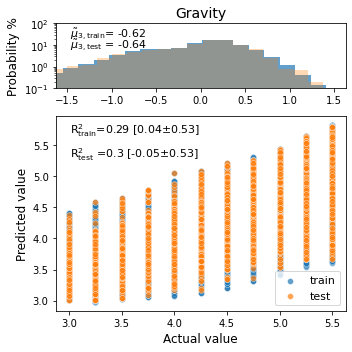

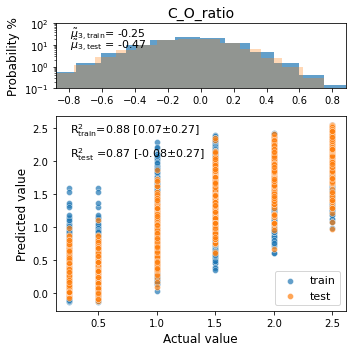

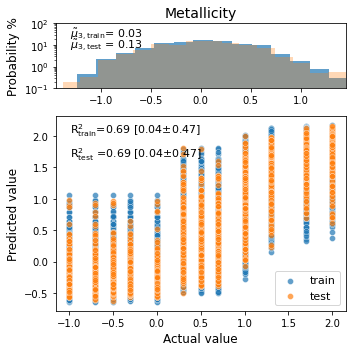

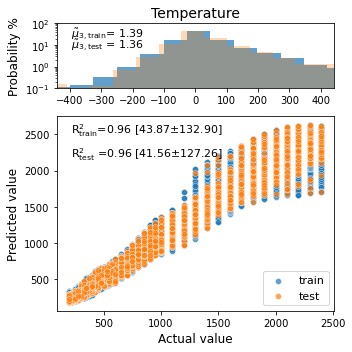

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )